In [65]:
import numpy as np
from numpy.linalg import norm
import scipy
from scipy import stats 
import librosa
import librosa.display
import control #mag2db
import matplotlib.pyplot as plt
import math
'''
https://training.ti.com/signal-noise-measurements-audio-applications

SNR as dB = 20 log (Desired Signal / Background Noise) (dB)

dB  | Volume Loudness
0   | 1.0
+6  | 1.52
+10 | 2.0
+20 | 4.0
+40 | 16.0
'''

'\nhttps://training.ti.com/signal-noise-measurements-audio-applications\n\nSNR as dB = 20 log (Desired Signal / Background Noise) (dB)\n\ndB  | Volume Loudness\n0   | 1.0\n+6  | 1.52\n+10 | 2.0\n+20 | 4.0\n+40 | 16.0\n'

In [54]:
#this function does not follow definition of SNR in mathematics:
#return value is The mean to standard deviation ratio(s) along axis, or 0 where the standard deviation is 0.
#signal to noise ratio
#https://www.geeksforgeeks.org/scipy-stats-signaltonoise-function-python/
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

'''
print ("\nsignaltonoise ratio for arr1 : ",  
       signaltonoise(arr1, axis = 0, ddof = 0)) 
  
print ("\nsignaltonoise ratio for arr1 : ",  
       signaltonoise(arr1, axis = 1, ddof = 0)) 
  
print ("\nsignaltonoise ratio for arr2 : ",  
       signaltonoise(arr2, axis = 0, ddof = 0)) 
'''

'\nprint ("\nsignaltonoise ratio for arr1 : ",  \n       signaltonoise(arr1, axis = 0, ddof = 0)) \n  \nprint ("\nsignaltonoise ratio for arr1 : ",  \n       signaltonoise(arr1, axis = 1, ddof = 0)) \n  \nprint ("\nsignaltonoise ratio for arr2 : ",  \n       signaltonoise(arr2, axis = 0, ddof = 0)) \n'

In [16]:
#this function does not work correctly
#https://python-deltasigma.readthedocs.io/en/latest/_modules/deltasigma/_calculateSNR.html
#replace dbv by control.mag2db for calculating dB value from ratio
def calculateSNR(hwfft, f, nsig=1):
    """Estimate the SNR from the FFT.

    Estimate the Signal-to-Noise Ratio (SNR), given the in-band bins of
    a Hann-windowed FFT and the location ``f0`` of the input signal (f>0).
    For ``nsig = 1``, the input tone is contained in ``hwfft(f:f+2)``,
    this range is appropriate for a Hann-windowed FFT.

    Each increment in ``nsig`` adds a bin to either side.

    The SNR is expressed in dB.

    **Parameters:**

    hwfft : sequence
            the FFT

    f : integer
        Location of the input signal. Normalized.

    .. note:: f = 0 corresponds to DC, as Python indexing starts from 0.

    nsig : integer, optional
           Extra bins added to either side. Defaults to 1.

    **Returns:**

    SNR : scalar
          The computed SNR value in dB.

    """
    hwfft = hwfft.squeeze()
    signalBins = np.arange(f - nsig + 1, f + nsig + 2, dtype='int64')
    signalBins = signalBins[signalBins > 0]
    signalBins = signalBins[signalBins <= max(hwfft.shape)]
    s = norm(hwfft[signalBins - 1]) # *4/(N*sqrt(3)) for true rms value;
    print(s)
    noiseBins = np.arange(1, max(hwfft.shape) + 1, dtype='int64')
    noiseBins = np.delete(noiseBins, noiseBins[signalBins - 1] - 1)
    n = norm(hwfft[noiseBins - 1])
    print(n)
    if n == 0:
        snr = np.Inf
    else:
        #snr = dbv(s/n)
        snr = control.mag2db(s/n)
    return snr

'''
x = np.fft.fft(y)
#x = y
x = calculateSNR(x, 200)
x = x.round(2)
print('snr = ', x, 'dB')
'''

In [58]:
fname = 'FPTOpenSpeechData_Set001_V0.1_000024.wav'
y, sr = librosa.load(fname)

Text(0.5, 1.0, 'Monophonic')

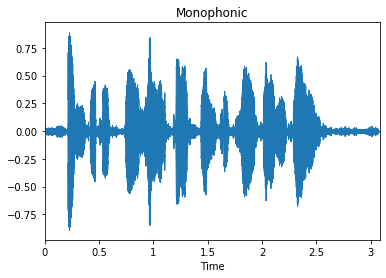

In [10]:
plt.figure()
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

In [68]:
'''
arr1 = [[20, 2, 7, 1, 34], 
        [50, 12, 12, 34, 4]] 
  
arr2 = [50, 12, 12, 34, 4] 
  
print ("\narr1 : ", arr1) 
print ("\narr2 : ", arr2) 
 
print ("\nsignaltonoise ratio for arr1 : ",  
       signaltonoise(arr1, axis = 0, ddof = 0)) 
  
print ("\nsignaltonoise ratio for arr1 : ",  
       signaltonoise(arr1, axis = 1, ddof = 0)) 
  
print ("\nsignaltonoise ratio for arr2 : ",  
       signaltonoise(arr2, axis = 0, ddof = 0))
'''

#shifting y to form non-zero waveform
y2 = y
y2 += abs(y2.min())
snr_val = signaltonoise(y2, axis = 0, ddof = 0)
snr_val = 20 * math.log(snr_val) #dB
snr_val = round(snr_val, 2)
print ("\nsignaltonoise ratio for audio file y : ", snr_val, "dB") #somehow reasonable at 37.17 dB


signaltonoise ratio for audio file y :  37.17 dB
